<h1>План работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подключение-к-БД" data-toc-modified-id="Подключение-к-БД-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подключение к БД</a></span></li><li><span><a href="#Cколько-книг-вышло-после-1-января-2000-года" data-toc-modified-id="Cколько-книг-вышло-после-1-января-2000-года-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cколько книг вышло после 1 января 2000 года</a></span></li><li><span><a href="#Количество-обзоров-и-средняя-оценка-для-каждой-книги" data-toc-modified-id="Количество-обзоров-и-средняя-оценка-для-каждой-книги-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Количество обзоров и средняя оценка для каждой книги</a></span></li><li><span><a href="#Определение-издательства,-которое-выпустило-наибольшее-число-книг-толще-50-страниц" data-toc-modified-id="Определение-издательства,-которое-выпустило-наибольшее-число-книг-толще-50-страниц-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Определение издательства, которое выпустило наибольшее число книг толще 50 страниц</a></span></li><li><span><a href="#Определение-автора-с-самой-высокой-средней-оценкой-книг-(учитываем-только-книги-с-50-и-более-оценками)" data-toc-modified-id="Определение-автора-с-самой-высокой-средней-оценкой-книг-(учитываем-только-книги-с-50-и-более-оценками)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Определение автора с самой высокой средней оценкой книг (учитываем только книги с 50 и более оценками)</a></span></li><li><span><a href="#Среднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок" data-toc-modified-id="Среднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Среднее количество обзоров от пользователей, которые поставили больше 50 оценок</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

Целью проекта является анализ базы данных сервиса для чтения книг по подписке.

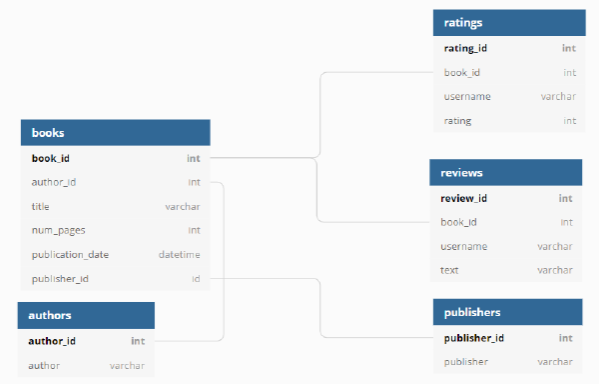

In [1]:
from IPython.core.display import Image, display
display(Image('111.png', width=900, unconfined=True))

# Описание данных

Таблица `books`<br>
Содержит данные о книгах:<br>
`book_id` — идентификатор книги;<br>
`author_id` — идентификатор автора;<br>
`title` — название книги;<br>
`num_pages` — количество страниц;<br>
`publication_date` — дата публикации книги;<br>
`publisher_id` — идентификатор издателя.<br>

Таблица `authors`<br>
Содержит данные об авторах:<br>
`author_id` — идентификатор автора;<br>
`author` — имя автора.<br>

Таблица `publishers`<br>
Содержит данные об издательствах:<br>
`publisher_id` — идентификатор издательства;<br>
`publisher` — название издательства;<br>

Таблица `ratings`<br>
Содержит данные о пользовательских оценках книг:<br>
`rating_id` — идентификатор оценки;<br>
`book_id` — идентификатор книги;<br>
`username` — имя пользователя, оставившего оценку;<br>
`rating` — оценка книги.<br>

Таблица `reviews`<br>
Содержит данные о пользовательских обзорах на книги:<br>
`review_id` — идентификатор обзора;<br>
`book_id` — идентификатор книги;<br>
`username` — имя пользователя, написавшего обзор;<br>
`text` — текст обзора.<br>

# Подключение к БД

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
 'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
 'port': 6432, # порт подключения
 'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [2]:
#Выведем содержимое всех баз данных
query = ''' 
SELECT * 
FROM books
LIMIT 10'''
pd.io.sql.read_sql(query, con = engine) 

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
5,6,257,1st to Die (Women's Murder Club #1),424,2005-05-20,116
6,7,258,2nd Chance (Women's Murder Club #2),400,2005-05-20,116
7,8,260,4th of July (Women's Murder Club #4),448,2006-06-01,318
8,9,563,A Beautiful Mind,461,2002-02-04,104
9,10,445,A Bend in the Road,341,2005-04-01,116


In [3]:
query = ''' 
SELECT * 
FROM authors
LIMIT 10'''
pd.io.sql.read_sql(query, con = engine) 

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
5,6,Alan Paton
6,7,Albert Camus/Justin O'Brien
7,8,Aldous Huxley
8,9,Aldous Huxley/Christopher Hitchens
9,10,Aleksandr Solzhenitsyn/H.T. Willetts


In [4]:
query = ''' 
SELECT * 
FROM publishers
LIMIT 10'''
pd.io.sql.read_sql(query, con = engine) 

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
5,6,Aladdin
6,7,Aladdin Paperbacks
7,8,Albin Michel
8,9,Alfred A. Knopf
9,10,Alfred A. Knopf Books for Young Readers


In [5]:
query = ''' 
SELECT * 
FROM ratings
LIMIT 15'''
pd.io.sql.read_sql(query, con = engine)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
5,6,3,johnsonamanda,4
6,7,3,scotttamara,5
7,8,3,lesliegibbs,5
8,9,4,abbottjames,5
9,10,4,valenciaanne,4


In [6]:
query = ''' 
SELECT * 
FROM reviews
LIMIT 10'''
pd.io.sql.read_sql(query, con = engine) 

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...
5,6,3,lesliegibbs,Analysis no several cause international.
6,7,4,valenciaanne,One there cost another. Say type save. With pe...
7,8,4,abbottjames,Within enough mother. There at system full rec...
8,9,5,npowers,Thank now focus realize economy focus fly. Ite...
9,10,5,staylor,Game push lot reduce where remember. Including...


# Cколько книг вышло после 1 января 2000 года

In [7]:
query = '''
SELECT COUNT(DISTINCT book_id) AS count_new_books
    FROM
        books
    WHERE
        publication_date > '2000-01-01' '''
    
    
    
pd.io.sql.read_sql(query, con = engine)

,count_new_books
0,819


После 1 января 2000 года вышло 819 книг

# Количество обзоров и средняя оценка для каждой книги

In [13]:
query = '''
SELECT 
    books.title AS name_book,
    COUNT(DISTINCT reviews.review_id) AS count_reviews,
    AVG(ratings.rating) AS avg_rating
FROM 
    books
    INNER JOIN reviews ON reviews.book_id=books.book_id
    INNER JOIN ratings ON ratings.book_id=books.book_id
GROUP BY
    books.title 
ORDER BY 
    count_reviews DESC
 LIMIT 30'''
    
    
    
pd.io.sql.read_sql(query, con = engine)

,name_book,count_reviews,avg_rating
0,Memoirs of a Geisha,8,4.138462
1,Twilight (Twilight #1),7,3.662500
2,The Book Thief,6,4.264151
3,The Road,6,3.772727
4,The Hobbit or There and Back Again,6,4.125000
5,Eat Pray Love,6,3.395833
6,The Catcher in the Rye,6,3.825581
7,Harry Potter and the Chamber of Secrets (Harry...,6,4.287500
8,The Giver (The Giver #1),6,3.750000
9,The Lightning Thief (Percy Jackson and the Oly...,6,4.080645


# Определение издательства, которое выпустило наибольшее число книг толще 50 страниц

In [9]:
query = '''
SELECT 
    publishers.publisher AS name_publisher,
    COUNT(books.num_pages > 50) AS counts
FROM 
    books
    INNER JOIN publishers ON publishers.publisher_id=books.publisher_id
GROUP BY
    publishers.publisher
ORDER BY 
    counts DESC
LIMIT 3 '''
    
    
    
pd.io.sql.read_sql(query, con = engine)

,name_publisher,counts
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25


Издательство, выпустившее наибольшее количество книг толще 50 страниц, - Penguin Books.

# Определение автора с самой высокой средней оценкой книг (учитываем только книги с 50 и более оценками)

In [10]:
query = '''
SELECT 
    authors.author,
    authors.author_id,
    AVG(ratings.rating) AS avg_rating
FROM 
    books
    INNER JOIN ratings ON ratings.book_id=books.book_id
    INNER JOIN authors ON authors.author_id=books.author_id
WHERE
    authors.author_id IN (SELECT
                              books.author_id
                         FROM
                             books
                         WHERE
                         books.book_id IN (SELECT 
                                                ratings.book_id
                                           FROM
                                               ratings
                                           GROUP BY
                                               ratings.book_id
                                           HAVING
                                               COUNT(ratings.rating_id) > 50))
GROUP BY
    authors.author, authors.author_id
ORDER BY 
    avg_rating DESC 
LIMIT 3'''
    
    
    
pd.io.sql.read_sql(query, con = engine)

,author,author_id,avg_rating
0,J.K. Rowling/Mary GrandPré,236,4.288462
1,Markus Zusak/Cao Xuân Việt Khương,402,4.264151
2,J.R.R. Tolkien,240,4.240964


Самый оцениваемый автор книг с самой высокой оценкой - J.K. Rowling/Mary GrandPré.

# Среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [11]:
query = '''
SELECT 
    SUM(SUBQ.cnt_reviews) / COUNT(SUBQ.cnt_reviews) AS cnt
FROM (
    SELECT
        reviews.username,
        COUNT(reviews.username) AS cnt_reviews
    FROM
        reviews
    WHERE
        reviews.username IN (SELECT
                                 ratings.username
                             FROM 
                                 ratings
                             GROUP BY
                                 ratings.username
                             HAVING
                                 COUNT(ratings.rating_id) > 50
                                 
                             )
    GROUP BY
        username) AS SUBQ '''
    
    
    
pd.io.sql.read_sql(query, con = engine)

,cnt
0,24.333333


Среднее количество обзоров активных пользователей равно 24.

# Общий вывод

* Количество книг, которые вышли после 1 января 2000 года - 819.

* Самое большое количество обзоров (8) у книги Мемуары Гейши со средней оценкой 4.138462. Также большое количество обзоров у книг Сумерки (ч.1) и Книжный вор.

* Издательство, которое выпустило наибольшее число книг толще 50 страниц - Penguin Books. На его счету 42 книги.

* Автор с самой высокой средней оценкой книг 4,29 - J.K. Rowling/Mary GrandPré.

* Среднее количество обзоров от пользователей, которые поставили больше 50 оценок - 24.
